# **Telecom Churn Prediction and Analysis**

## **Objective:**
The goal of this notebook is to explore and analyze the Telecom Churn dataset to understand factors contributing to customer churn and to develop a predictive model that can forecast customer churn with high accuracy.

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

## **Dataset Description:**
The Telecom Churn dataset comprises customer data from a telecom company. Key features include customer account information, demographic data, service usage, and churn status (Yes or No).
#### Data Fields:
- CustomerID: Unique identifier for the customer
- Gender: Customer gender (Male, Female)
- Age: Customer age
- Tenure: Number of months the customer has stayed with the company
- ServiceCalls: Number of customer service calls made
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Customer churn status (Yes or No)

In [248]:
data = pd.read_csv("/content/Telecom_Customer_Churn_Dataset.csv")
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## **Data Preprocessing**

In [249]:
data.shape

(7043, 21)

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [251]:
print(data['SeniorCitizen'].nunique())
data['SeniorCitizen'].unique()

2


array([0, 1])

In [252]:
print(data['Contract'].nunique())
data['Contract'].unique()

3


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [253]:
print(data['PaymentMethod'].nunique())
data['PaymentMethod'].unique()

4


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [254]:
print(data['Partner'].nunique())
data['Partner'].unique()

2


array(['Yes', 'No'], dtype=object)

In [255]:
print(data['DeviceProtection'].nunique())
data['DeviceProtection'].unique()

3


array(['No', 'Yes', 'No internet service'], dtype=object)

In [256]:
print(data['PhoneService'].nunique())
data['PhoneService'].unique()

2


array(['No', 'Yes'], dtype=object)

In [257]:
print(data['Churn'].nunique())
data['Churn'].unique()

2


array(['No', 'Yes'], dtype=object)

In [258]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [259]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in `TotalCharges` column which can be replaced with mean or median of the data column.

In [260]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [261]:
# Calculate the mean of the column
mid = data['TotalCharges'].median()

# Replace missing values with the mean
data['TotalCharges'].fillna(mid, inplace=True)

In [262]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [263]:
data.duplicated().sum()

0

The dataset has no dublicates.

## **Exploratory Data Analysis**

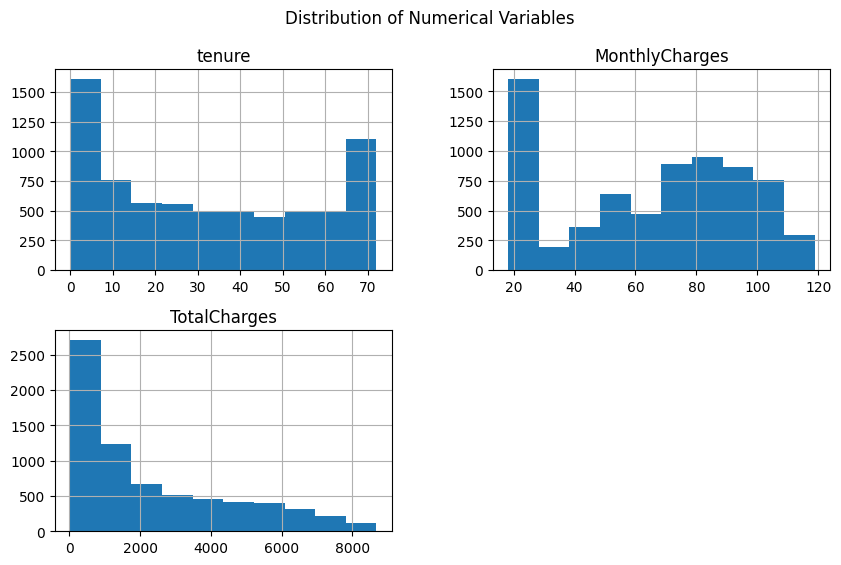

In [264]:
# Distribution of key variables
# Numerical variables
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_cols].hist(figsize=(10, 6))
plt.suptitle('Distribution of Numerical Variables')
plt.show()




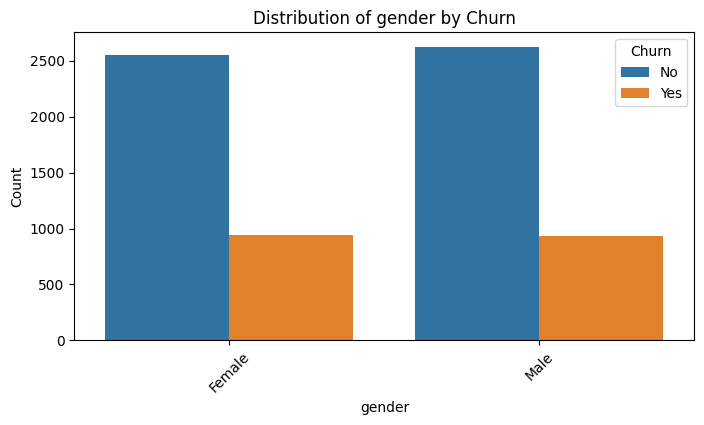

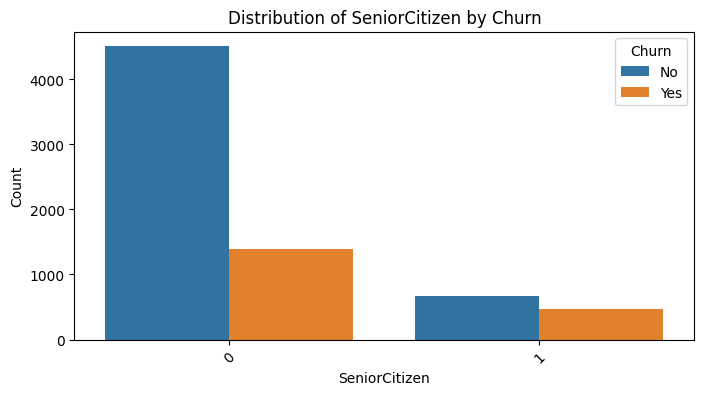

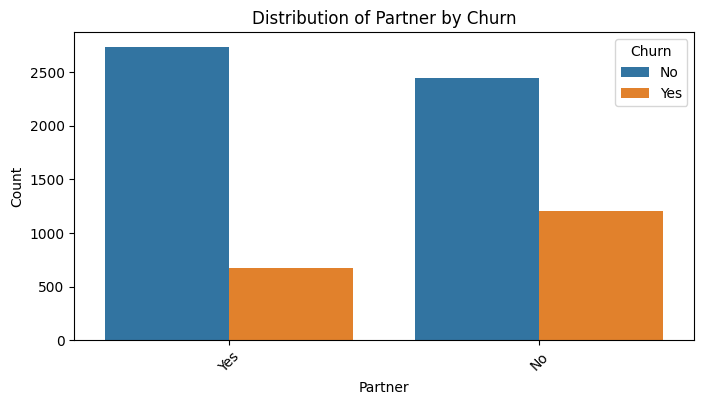

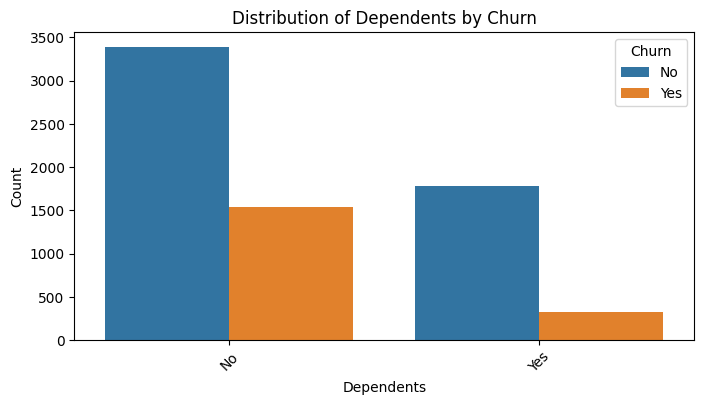

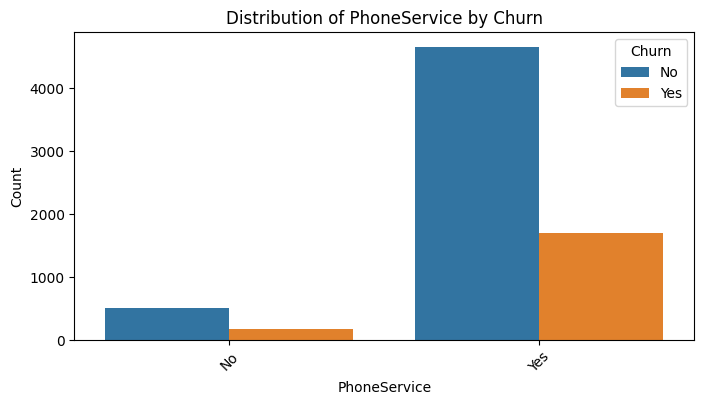

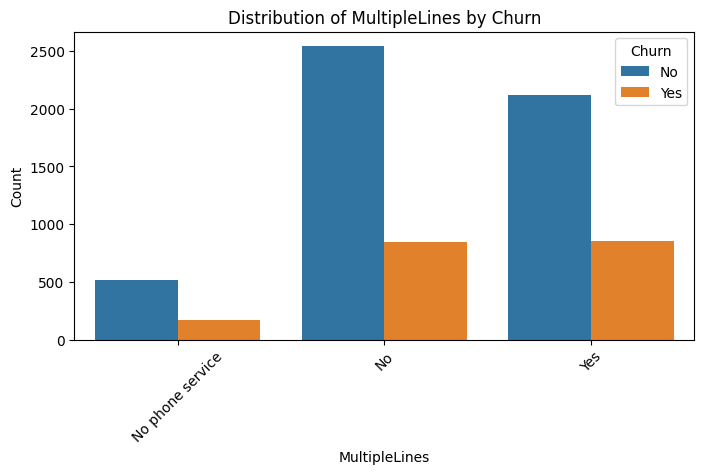

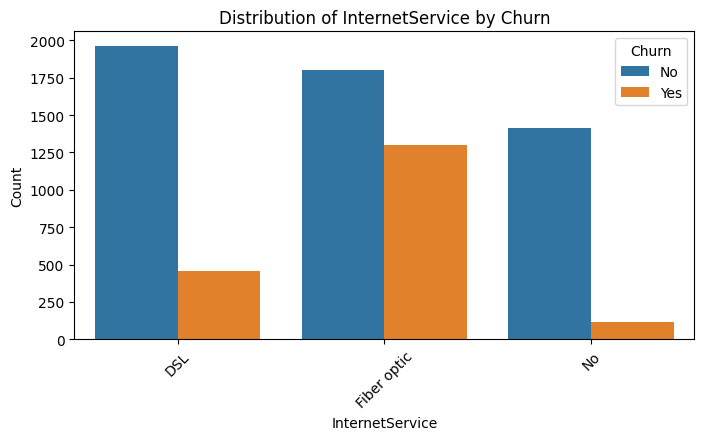

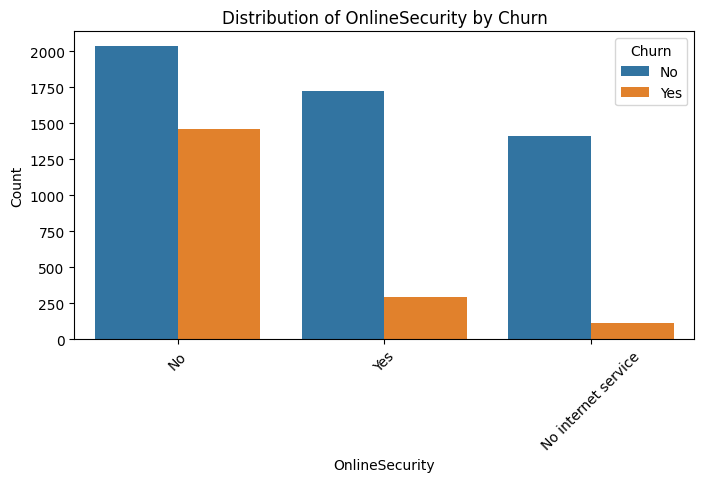

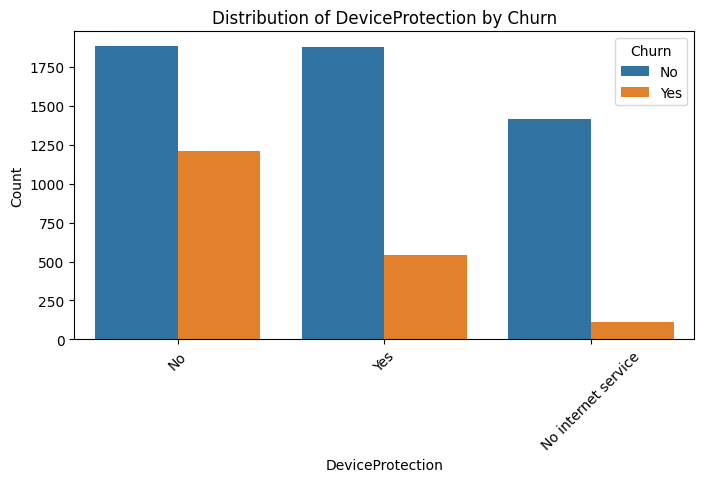

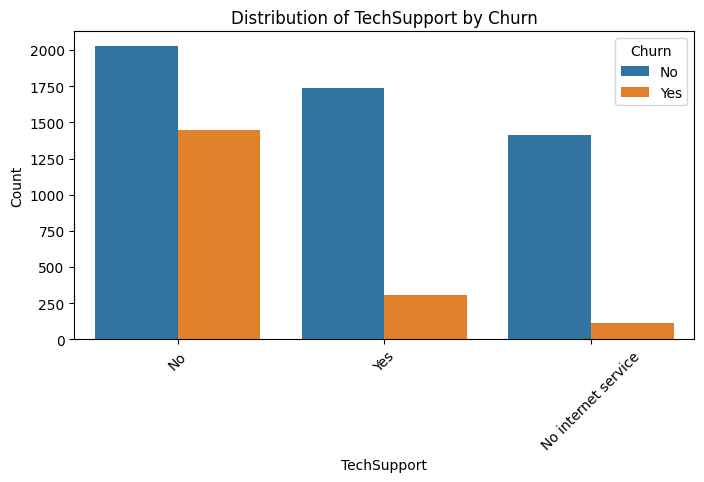

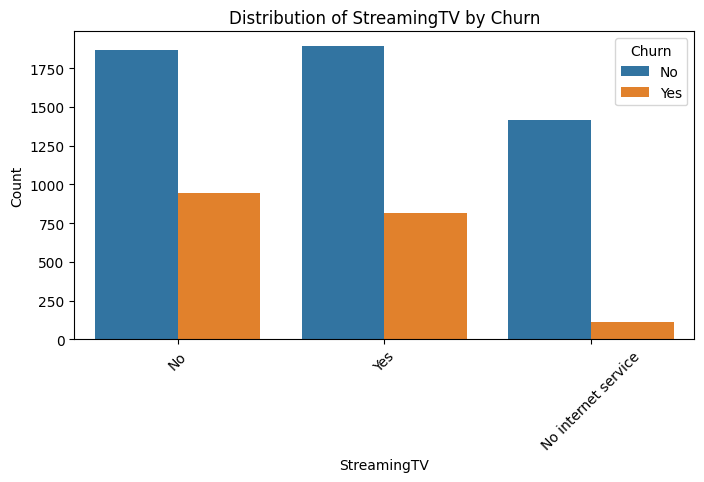

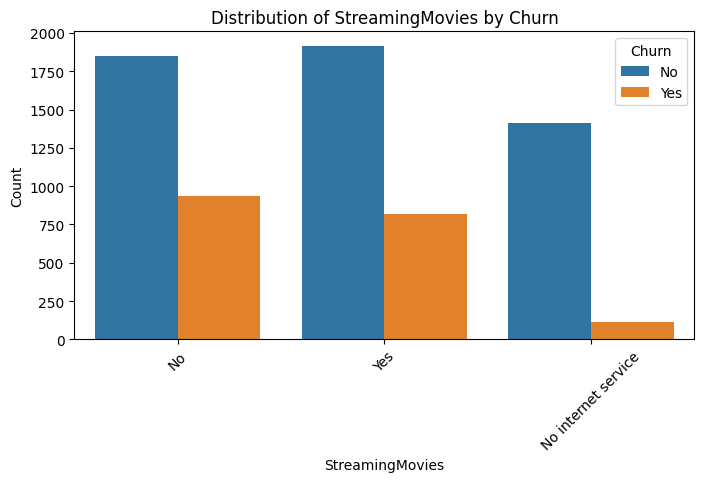

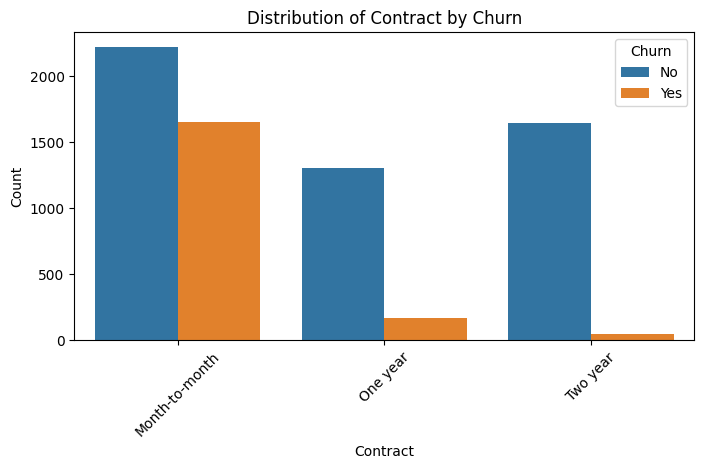

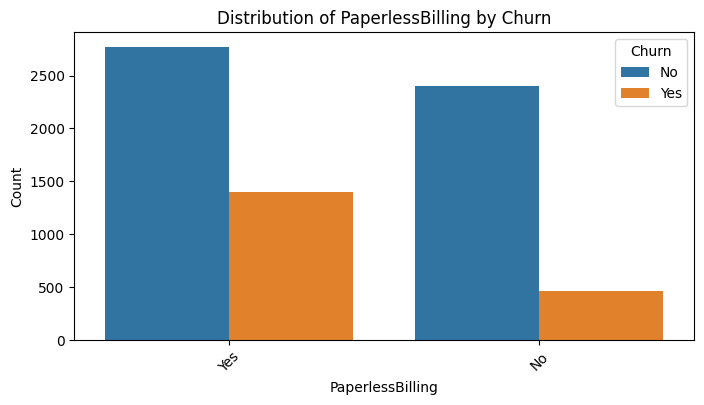

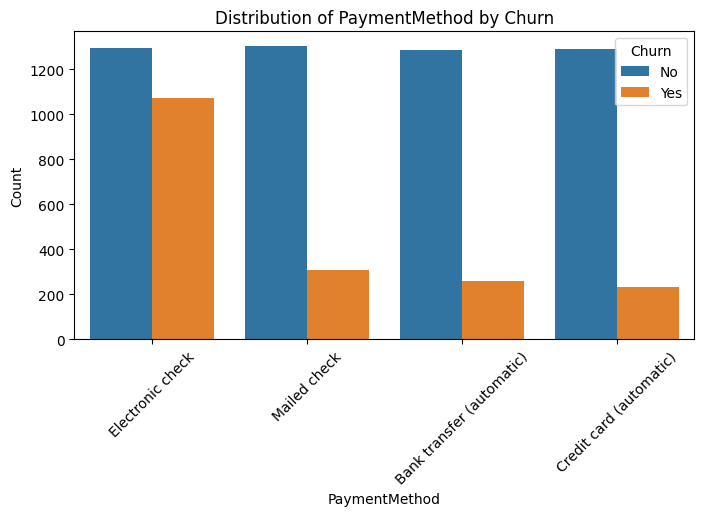

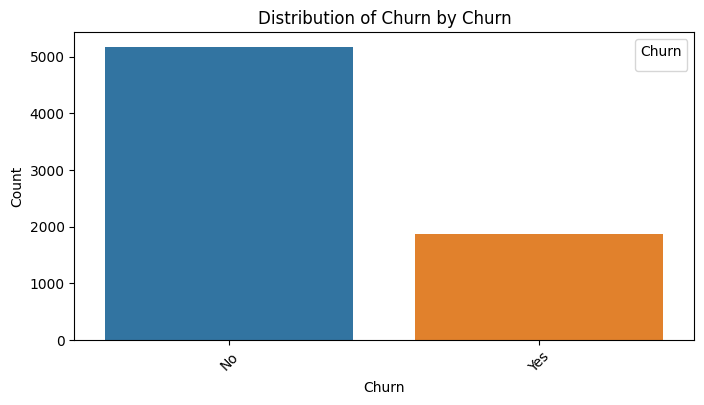

In [265]:
# Categorical variables
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()


Correlation Matrix:
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102652
tenure               0.016567  1.000000        0.247900      0.825464
MonthlyCharges       0.220173  0.247900        1.000000      0.650864
TotalCharges         0.102652  0.825464        0.650864      1.000000


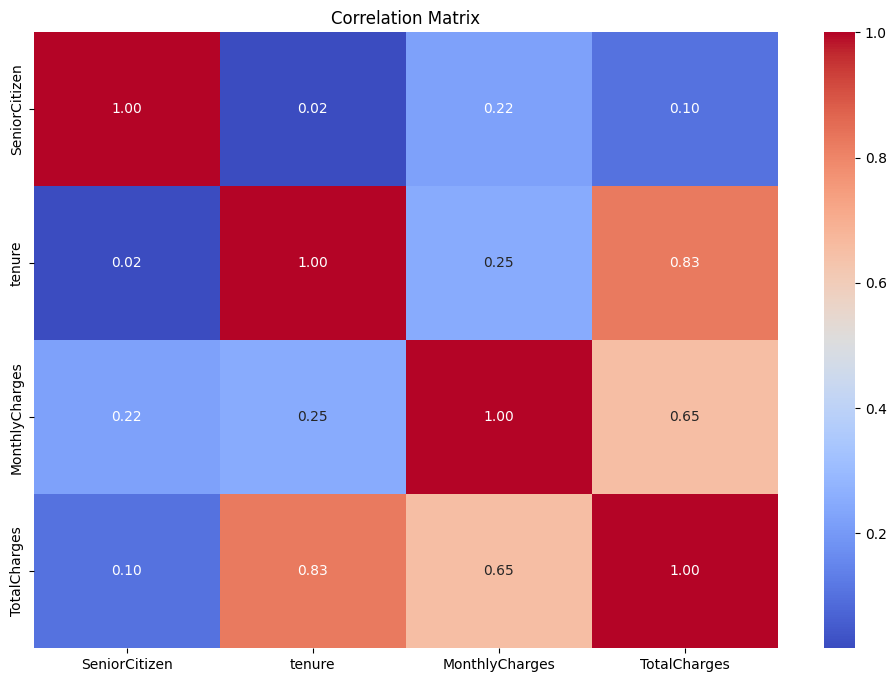

In [266]:
# Investigate relationships between features
# Select only numeric columns
numeric_df = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


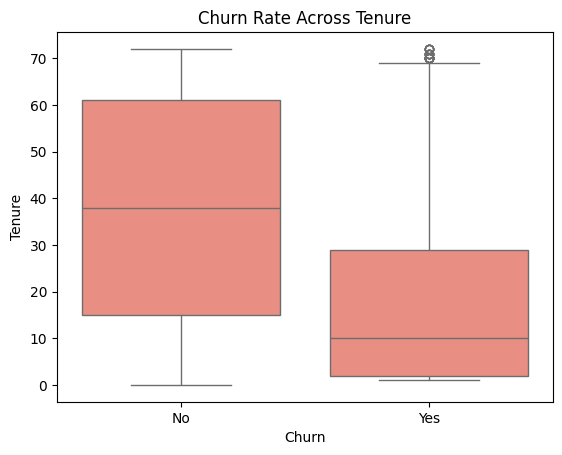

In [267]:
# Churn rate across tenure
sns.boxplot(x='Churn', y='tenure', data=data, color='salmon')
plt.title('Churn Rate Across Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


Long-term clients tend to stay while new clients having a short tenure of 1-2 years tend to churn.

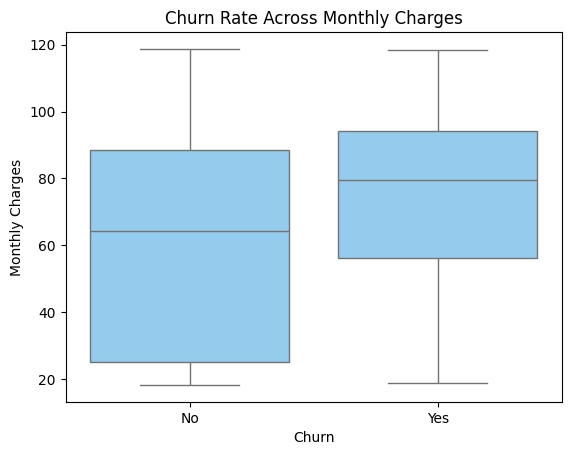

In [268]:
# Churn rate across MonthlyCharges
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, color='lightskyblue')
plt.title('Churn Rate Across Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


Increase in monthly charges is also seen to be a factor for higher churn rates.

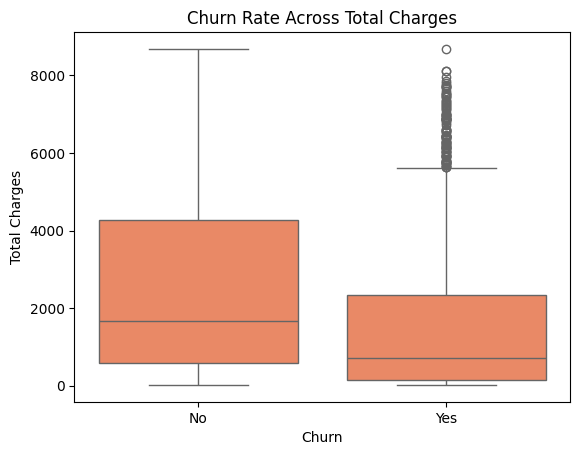

In [269]:
# Churn rate across TotalCharges
sns.boxplot(x='Churn', y='TotalCharges', data=data, color='coral')
plt.title('Churn Rate Across Total Charges')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

Total charges does not seem to be a sigificant factor for higher churn rate.

## **Feature Engineering**

In [270]:
# Create new features
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, data['tenure'].max()], labels=['New', 'Intermediate', 'Mid-term', 'Long-term', 'Very Long-term'])
data['FamilyStatus'] = (data['Partner'] == 'Yes') | (data['Dependents'] == 'Yes')
data['NumServices'] = data[['PhoneService', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda row: sum(row == 'Yes'), axis=1)


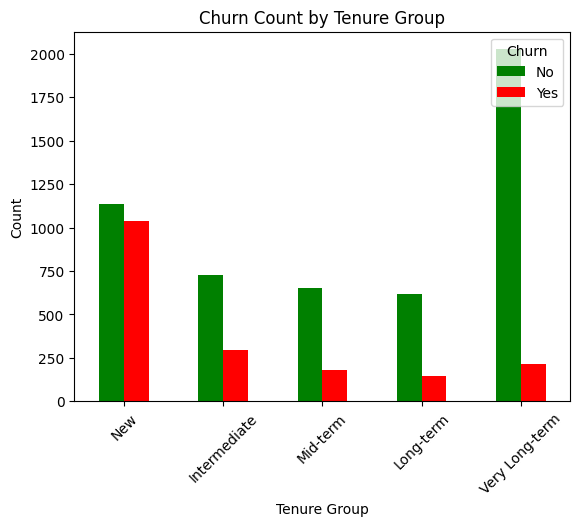

In [271]:
# Calculate churn counts within each tenure group
grouped = data.groupby(['TenureGroup', 'Churn']).size().unstack()

# Plot grouped bar plot
grouped.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title('Churn Count by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.show()

In [272]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,FamilyStatus,NumServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New,True,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Mid-term,False,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New,False,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long-term,False,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New,False,1


In [273]:
# Interaction features
data['InternetAndPhoneService'] = (data['PhoneService'] == 'Yes') & (data['InternetService'] != 'No')
data['SecurityAndSupportBundle'] = (data['OnlineSecurity'] == 'Yes') & (data['TechSupport'] == 'Yes')

In [274]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,FamilyStatus,NumServices,InternetAndPhoneService,SecurityAndSupportBundle
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,New,True,0,False,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,Mid-term,False,3,True,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,New,False,2,True,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,Long-term,False,3,False,True
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,New,False,1,True,False


## **Feature Encoding**

In [275]:
# Encode categorical features
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod','MultipleLines','InternetService','PaymentMethod','TenureGroup'])

In [276]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_New,TenureGroup_Intermediate,TenureGroup_Mid-term,TenureGroup_Long-term,TenureGroup_Very Long-term
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,False,False,False,True,False,True,False,False,False,False
1,5575-GNVDE,Male,0,No,No,34,Yes,Yes,No,Yes,...,False,False,False,False,True,False,False,True,False,False
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,Yes,No,...,False,False,False,False,True,True,False,False,False,False
3,7795-CFOCW,Male,0,No,No,45,No,Yes,No,Yes,...,False,True,False,False,False,False,False,False,True,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,False,False,False,True,False,True,False,False,False,False


In [277]:
from sklearn.preprocessing import LabelEncoder
# Select categorical columns
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'PaperlessBilling','DeviceProtection','OnlineBackup', 'TechSupport','StreamingTV','StreamingMovies', 'PaperlessBilling', ]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [278]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'FamilyStatus', 'NumServices', 'InternetAndPhoneService',
       'SecurityAndSupportBundle', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureGroup_New', 'T

In [279]:
data.drop(columns=['customerID'], inplace=True) # is not required for analysis

In [280]:
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

In [281]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_New,TenureGroup_Intermediate,TenureGroup_Mid-term,TenureGroup_Long-term,TenureGroup_Very Long-term
0,0,0,1,0,1,0,0,2,0,0,...,False,False,False,True,False,True,False,False,False,False
1,1,0,0,0,34,1,2,0,2,0,...,False,False,False,False,True,False,False,True,False,False
2,1,0,0,0,2,1,2,2,0,0,...,False,False,False,False,True,True,False,False,False,False
3,1,0,0,0,45,0,2,0,2,2,...,False,True,False,False,False,False,False,False,True,False
4,0,0,0,0,2,1,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False


In [282]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [283]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_New,TenureGroup_Intermediate,TenureGroup_Mid-term,TenureGroup_Long-term,TenureGroup_Very Long-term
0,0,0,1,0,0.013889,0,0,2,0,0,...,False,False,False,True,False,True,False,False,False,False
1,1,0,0,0,0.472222,1,2,0,2,0,...,False,False,False,False,True,False,False,True,False,False
2,1,0,0,0,0.027778,1,2,2,0,0,...,False,False,False,False,True,True,False,False,False,False
3,1,0,0,0,0.625000,0,2,0,2,2,...,False,True,False,False,False,False,False,False,True,False
4,0,0,0,0,0.027778,1,0,0,0,0,...,False,False,False,True,False,True,False,False,False,False


## **Feature Selection**

In [284]:
# Feature selection
# Example: Recursive Feature Elimination (RFE) with a Random Forest Classifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['Churn'])
y = data['Churn']

rf_model = RandomForestClassifier()
rfe = RFE(rf_model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['gender', 'tenure', 'OnlineSecurity', 'TechSupport', 'MonthlyCharges',
       'TotalCharges', 'NumServices', 'Contract_Month-to-month',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check'],
      dtype='object')


We can reduce the dimensionality of the data by selecting the most important features. This will resullt in an optimum network and improved results.

## **Predictive Modeling**

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [289]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


RandomForestClassifier()

In [290]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
logistic_preds = logistic_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [292]:
# Evaluation metrics
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_preds))
print("Precision:", precision_score(y_test, logistic_preds))
print("Recall:", recall_score(y_test, logistic_preds))
print("F1 Score:", f1_score(y_test, logistic_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, logistic_preds))

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_preds))

Logistic Regression:
Accuracy: 0.8126330731014905
Precision: 0.6763754045307443
Recall: 0.5603217158176944
F1 Score: 0.6129032258064516
ROC-AUC Score: 0.731898309646299

Random Forest Classifier:
Accuracy: 0.7899219304471257
Precision: 0.6452830188679245
Recall: 0.4584450402144772
F1 Score: 0.5360501567398118
ROC-AUC Score: 0.6838557247404432


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



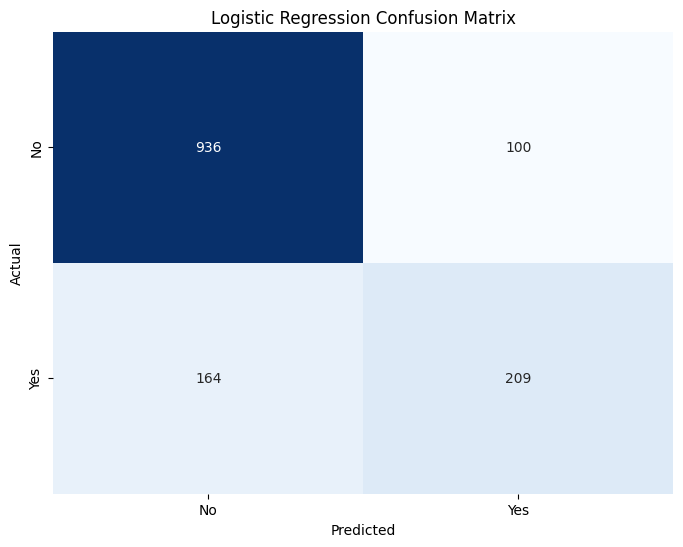

In [296]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom labels for confusion matrix
labels = ['No', 'Yes']

# Generate classification report and confusion matrix for Logistic Regression
logistic_report = classification_report(y_test, logistic_preds)
logistic_conf_matrix = confusion_matrix(y_test, logistic_preds)

print("Logistic Regression Classification Report:")
print(logistic_report)

plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



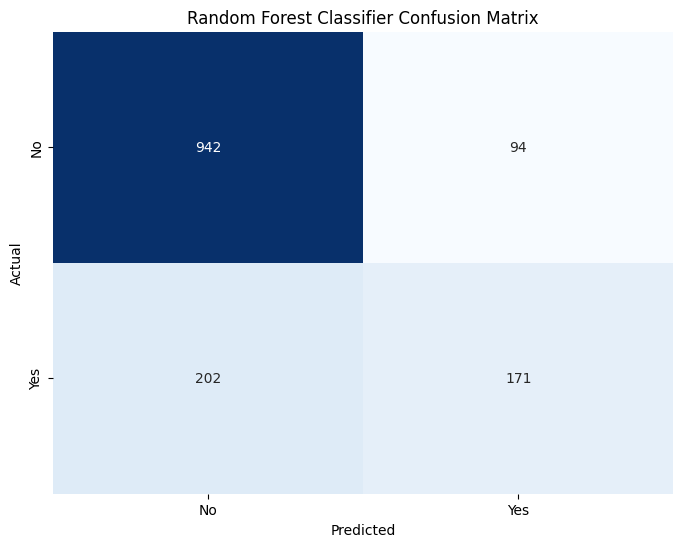

In [297]:
# Generate classification report and confusion matrix for Random Forest Classifier
rf_report = classification_report(y_test, rf_preds)
rf_conf_matrix = confusion_matrix(y_test, rf_preds)

print("\nRandom Forest Classifier Classification Report:")
print(rf_report)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Model Tuning**

Parameters used for tuning a logistic regression model:

1. **`C`**:
   - It controls the regularization strength in logistic regression. Smaller values indicate stronger regularization, preventing overfitting by penalizing large parameter values.
   - In the parameter grid, different values of `C` ranging from very small (0.001) to very large (100) are specified. This allows the grid search to explore a wide range of regularization strengths.

2. **`penalty`**:
   - This parameter determines the type of regularization used in logistic regression.
   - `'l1'` penalty refers to L1 regularization, which adds the absolute values of the coefficients to the loss function. It can lead to sparse solutions by pushing less informative features' coefficients to zero.
   - `'l2'` penalty refers to L2 regularization, which adds the squared magnitudes of the coefficients to the loss function. It tends to shrink the coefficients towards zero without necessarily setting them to zero.
   - By including both penalties in the parameter grid, the grid search will explore the effects of different types of regularization.

Overall, these parameters allow the grid search to systematically evaluate the logistic regression model's performance across various regularization strengths and types, helping to find the combination that optimizes the model's predictive performance.

In [298]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for logistic regression
logistic_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid search with cross-validation for logistic regression
logistic_grid_search = GridSearchCV(LogisticRegression(), logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Certainly! Here's an explanation of the parameters in the `rf_param_grid` dictionary used for tuning a Random Forest Classifier:

1. **`n_estimators`**:
   - This parameter determines the number of trees in the random forest. Each tree in the forest is built using a different random subset of the training data.
   - In the parameter grid, `[50, 100, 200]` are the candidate values for `n_estimators`. These values represent different numbers of trees to be included in the random forest.

2. **`max_depth`**:
   - The `max_depth` parameter controls the maximum depth of each decision tree in the random forest. A deeper tree can capture more complex relationships in the data, but it also increases the risk of overfitting.
   - In the parameter grid, `[None, 10, 20]` are the candidate values for `max_depth`. Using `None` means that there is no maximum depth limit, allowing the trees to grow until all leaves are pure or until they contain less than `min_samples_split` samples.

3. **`min_samples_split`**:
   - This parameter specifies the minimum number of samples required to split an internal node in a decision tree. It helps control the tree's complexity and prevents overfitting.
   - In the parameter grid, `[2, 5, 10]` are the candidate values for `min_samples_split`. These values represent different thresholds for splitting nodes based on the number of samples.

4. **`min_samples_leaf`**:
   - The `min_samples_leaf` parameter determines the minimum number of samples required to be at a leaf node. It helps prevent overfitting by controlling the minimum size of the leaves.
   - In the parameter grid, `[1, 2, 4]` are the candidate values for `min_samples_leaf`. These values represent different thresholds for the minimum number of samples required to form a leaf node.

In [299]:
# Define parameter grid for random forest classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Grid search with cross-validation for random forest classifier
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [300]:
# Get best parameters and best scores
print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best score for Logistic Regression:", logistic_grid_search.best_score_)

print("\nBest parameters for Random Forest Classifier:", rf_grid_search.best_params_)
print("Best score for Random Forest Classifier:", rf_grid_search.best_score_)

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best score for Logistic Regression: 0.8026256853811106

Best parameters for Random Forest Classifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best score for Random Forest Classifier: 0.8033355345381645


In [301]:
# Evaluate tuned models
tuned_logistic_model = logistic_grid_search.best_estimator_
tuned_rf_model = rf_grid_search.best_estimator_

tuned_logistic_preds = tuned_logistic_model.predict(X_test)
tuned_rf_preds = tuned_rf_model.predict(X_test)

# Compare performance before and after tuning
print("Logistic Regression Performance (Before Tuning):")
print(classification_report(y_test, logistic_preds))

print("\nLogistic Regression Performance (After Tuning):")
print(classification_report(y_test, tuned_logistic_preds))

print("\nRandom Forest Classifier Performance (Before Tuning):")
print(classification_report(y_test, rf_preds))

print("\nRandom Forest Classifier Performance (After Tuning):")
print(classification_report(y_test, tuned_rf_preds))


Logistic Regression Performance (Before Tuning):
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409


Logistic Regression Performance (After Tuning):
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409


Random Forest Classifier Performance (Before Tuning):
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.46      0.54       373

    accuracy                 

## **Interpretation and Conclusion**

In [302]:
# 1. Interpretation of Model Results
# For Logistic Regression:
logistic_coefficients = logistic_model.coef_[0]
feature_names = X.columns

logistic_feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': logistic_coefficients})
logistic_feature_importance = logistic_feature_importance.sort_values(by='Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(logistic_feature_importance)

# For Random Forest Classifier:
rf_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

print("\nRandom Forest Classifier Feature Importances:")
print(rf_feature_importance)



Logistic Regression Coefficients:
                                    Feature  Coefficient
40               TenureGroup_Very Long-term     0.864173
19                  Contract_Month-to-month     0.740487
30              InternetService_Fiber optic     0.589581
39                    TenureGroup_Long-term     0.472198
18                 SecurityAndSupportBundle     0.466063
12                         PaperlessBilling     0.329891
16                              NumServices     0.214259
27           MultipleLines_No phone service     0.195971
1                             SeniorCitizen     0.177809
14                             TotalCharges     0.174283
34           PaymentMethod_Electronic check     0.109422
24           PaymentMethod_Electronic check     0.109422
2                                   Partner     0.075728
11                          StreamingMovies     0.073609
17                  InternetAndPhoneService     0.060728
20                        Contract_One year     0.0296

In [303]:
# 2. Key Factors Predicting Churn
# Identify top features with highest coefficients or feature importances
top_features_logistic = logistic_feature_importance['Feature'].head(5).tolist()
top_features_rf = rf_feature_importance['Feature'].head(5).tolist()

print("Top Features Predicting Churn (Logistic Regression):", top_features_logistic)
print("Top Features Predicting Churn (Random Forest Classifier):", top_features_rf)



Top Features Predicting Churn (Logistic Regression): ['TenureGroup_Very Long-term', 'Contract_Month-to-month', 'InternetService_Fiber optic', 'TenureGroup_Long-term', 'SecurityAndSupportBundle']
Top Features Predicting Churn (Random Forest Classifier): ['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'OnlineSecurity']


Based on the coefficients for Logistic Regression and feature importances for Random Forest Classifier, we can identify the key factors predicting churn. Here's a summary:

**Key Factors Predicting Churn (Logistic Regression):**
1. TenureGroup_Very Long-term
2. Contract_Month-to-month
3. InternetService_Fiber optic
4. TenureGroup_Long-term
5. SecurityAndSupportBundle

**Key Factors Predicting Churn (Random Forest Classifier):**
1. TotalCharges
2. MonthlyCharges
3. Tenure
4. Contract_Month-to-month
5. OnlineSecurity

**Actionable Insights and Recommendations:**
1. **Focus on Month-to-Month Contracts**: Customers with month-to-month contracts are more likely to churn. Consider offering incentives for longer-term contracts to improve retention.
2. **Improve Customer Experience for Fiber Optic Users**: Customers with fiber optic internet service are more likely to churn. Enhance service quality and address any issues specific to this service to retain these customers.
3. **Enhance Security and Support**: Customers who do not have a comprehensive security and support bundle are more likely to churn. Provide additional security features and proactive customer support to improve satisfaction and loyalty.
4. **Address Billing and Payment Issues**: Total charges, monthly charges, and payment method (especially electronic check) are significant factors. Simplify billing processes and offer flexible payment options to reduce churn.
5. **Focus on New Customers**: New customers (especially those in the very long-term tenure group) are more likely to churn. Implement onboarding programs and special offers to engage new customers and encourage long-term commitment.

By addressing these key factors and implementing targeted strategies, businesses can reduce churn rates and improve customer retention.

In [304]:
# 3. Actionable Insights and Recommendations
# Provide actionable insights and recommendations based on identified key factors
print("\nActionable Insights and Recommendations:")
print("- Implement targeted marketing campaigns focusing on", top_features_logistic[0], "and", top_features_rf[0], "to address specific customer needs.")
print("- Enhance", top_features_logistic[1], "and", top_features_rf[1], "to improve customer satisfaction and loyalty.")
print("- Offer incentives or loyalty programs for customers identified with high churn risk based on", top_features_logistic[2], "and", top_features_rf[2], ".")
print("- Proactively address issues related to", top_features_logistic[3], "and", top_features_rf[3], "to prevent churn and improve customer retention.")
print("- Monitor", top_features_logistic[4], "and", top_features_rf[4], "to detect early signs of churn and take preventive measures.")


Actionable Insights and Recommendations:
- Implement targeted marketing campaigns focusing on TenureGroup_Very Long-term and TotalCharges to address specific customer needs.
- Enhance Contract_Month-to-month and MonthlyCharges to improve customer satisfaction and loyalty.
- Offer incentives or loyalty programs for customers identified with high churn risk based on InternetService_Fiber optic and tenure .
- Proactively address issues related to TenureGroup_Long-term and Contract_Month-to-month to prevent churn and improve customer retention.
- Monitor SecurityAndSupportBundle and OnlineSecurity to detect early signs of churn and take preventive measures.
